# Index

* [Introduction](#Introduction)
    * Neo4j & Python
    * A Note on Python Versions
* [Setup](#Setup) 
    * Install Neo4j
    * Setup Database Authentication
    * Installing Python to Neo4j Middleware
* [Cypher Basics – Neo4j Driver Middleware](#Cypher-Basics-–-Neo4j-Driver-Middleware)
    * Connecting to Neo4j & Creating a Session
    * The Cypher Query Language
* [API Based Programmatic Access – Py2Neo Middleware](#API-Based-Programmatic-Access-–-Py2Neo-Middleware)
    * Basic Programmatic API Example
    * Py2Neo
* [Common Neo4j Issues & Their Solutions](#Common-Neo4j-Issues-&-Their-Solutions)
    * Authentication Trouble
    * If You Previously Installed Neo4j and Forgot Your Username/Password
    * Port Bind Exception
    * Server Certificate Does Not Match Known Certificate for 'localhost'
    * General SSL Engine Problem
* [DREAM Data Access](#DREAM-Data-Access)
    * Just a Subset Please
    * Full Disease Module Detection DREAM Challenge Data   
* [Exploring The DREAM Data With NetworkX](#Exploring-The-DREAM-Data-With-NetworkX)
    * Importing The DREAM Data
    * Generating The Network
    * Plotting the Network
    * Plotting the Network Degree Distribution
    * Plotting the Weighted Network Degree Distribution
    * Centrality
    * But Modules?

# Introduction

This tutorial is written for people with a general technical background, specifically a basic knowledge of databases, working in the terminal, and a good understanding of at least one computer language. It was written with Unix operating systems in mind, so while we discuss installation steps for Windows in brief and have made an effort to support it on a basic level, some of the code (i.e. most if not all the terminal commands) and file locations may differ. 

So, what can this tutorial do for you?
* Help you get a Neo4j database up and running quickly on your local machine
* Give you a quick guided tour of Neo4j & Cypher to see how they work together
* Expose you to two different flavors of Neo4j to Python middleware
* Help you perform a preliminary analysis on a subset of data from the [Disease Module Identification DREAM Challenge](https://www.synapse.org/#!Synapse:syn6156761/wiki/400645)

That said, if you are already well-versed in Neo4j and feel comfortable with Cypher feel free to [grab the DREAM data](#Data-Access) and skip ahead to the second part of the tutorial. Also, don't forget to [install NetworkX](#Installing-Python-to-Neo4j-Middleware-&-NetworkX) for the analysis portion. We're excited to see what analyses people may run now and in the future. 

And of course, if you run into any issues, give a shout to either Ben, Eric, or Ian and we'll come lend a hand. Finally, we hope you find this a fun and approachable way to getting started with Neo4j. Happy keyboard mashing!

### A Note on Python Versions

In [1]:
import sys
vinfo = sys.version_info
version = "%d.%d.%d" % (vinfo.major, vinfo.minor, vinfo.micro)
try:
    eval("print(\"This Notebook is Running on Python Version: %s\" % version)")
except:
    eval("print \"This Notebook is Running on Python Version: %s\" % version")

This Notebook is Running on Python Version: 3.5.2


This tutorial was written using Python 3.5, so if you only have Python 2.x, you may find some things are different. While there are several (very small) differences between the two versions of the language, the ones that will be of interest for this tutorial relate to the print statement / function and Python's package manager Pip:

 Python 2.x         | Python 3.x        
 ------------------ | :------------------:
 `print "oink"`     | `print("oink")`   
 `pip install woof` | `pip3 install woof`
 
 **<span style="color: red;">Caveat:</span>** *It is possible that if you only have a Python3 installation, you will not need to use `pip3` in place of `pip`.*

# Setup

### Install Neo4j

We've tested two ways to setup Neo4j on Mac OS X and one on Microsoft Windows that you can choose from below. 

#### Homebrew – Mac OS X

There are a number of ways you can install Neo4j. If you have homebrew, type the following command into your terminal:
```
brew install neo4j
```
Be sure to take note of what version is installed (there's a chance you may need this in a moment); for me it was 3.0.3, but at the time of writing the latest is 3.0.6. 

#### Desktop Application – Mac OS X & Microsoft Windows

* Go to the [Neo4j website](https://neo4j.com)
* Click the big red Download button
* Click the green Download Community Edition button
* Select the appropriate download and run through the installation steps required by your OS

### Setup Database Authentication

It's recommended you setup a username/password for Neo4j (that said, read the caveat below before you do.) To do this:

* Go to your terminal application and open up a new window or pane, and type: 
```
neo4j console
```
* Next, in your browser navigate to [`http://localhost:7474`](http:////localhost:7474)
* You should be prompted to set a new username/password. Of course, make sure it's something you'll remember; resetting your user/pass in Neo4j tends to be a bit of terminal hackery and is poorly documented. If you're having trouble, you can skip down to the [Authentication's No Fun :(](#Authentication's-No-Fun-:-() section to disable authentication; if you already setup a user/pass and forgot it, check out [Some Helpful Installation Hints](#Some-Helpful-Installation-Hints).

**<span style="color: green;">Tip:</span>** *Once you've set this up, you may want to take a moment and explore the Neo4j web application. It's a cute way to play around with some toy databases, check out some nifty network visualizations, send some queries, and get a feel for the syntax and functionality of the Cypher query language. If you came here for the DREAM data and are thinking, 'Meh, I'm not into toys and cute stuff, I'm a hardcore bioinformaticist.', scroll down to the [DREAM Data Access](#DREAM-Data-Access) portion for some much-less-cute (but really it's not bad at all) bioinformatics data.*

**<span style="color: red;">Caveat:</span>** *The user/pass you set will need to be hardcoded into the Python code of this tutorial early on, so if you feel more comfortable going with the default user/pass, follow the instructions above up to setting your user/pass.*

### Installing Python to Neo4j Middleware & NetworkX

Python does not natively support interacting with Neo4j and requires middleware to do so. There are several available each with their own flavor, one of which is officially sponsored by Neo4j. We'll be using two Python to Neo4j middlewares in this tutorial. 

The first is the [official Neo4j middleware](https://neo4j.com/developer/python/), which has been designed to expose the Cypher query language in the Python environment and facilitate connecting to any Neo4j instance.

The second middleware is the [unofficial Py2Neo](http://py2neo.org/v3/). The design of this middleware is different; rather than use the Cypher query language (i.e. bumble through learning a language with a syntax that may be quite foreign), Py2Neo provides us with a Pythonic API to access and query the database with almost no knowledge of the Cypher language required. Similar to the official Neo4j, it too allows for easy connecting to any Neo4j instance. 

To install the two middlewares, paste the commands below into your terminal:
```
pip3 install neo4j-driver
pip3 install py2neo
```

Finally, if you plan on exploring the [DREAM Disease Module Identification Challenge](https://www.synapse.org/#!Synapse:syn6156761) data, a great package to work with it is [NetworkX](https://networkx.github.io). Also, we'll be using [Matplotlib](http://matplotlib.org) too. If you don't have them already, paste the commands below into you terminal to install them:
```
pip3 install networkx
pip3 install matplotlib
```

# Cypher Basics – Neo4j Driver Middleware

### Connecting to Neo4j & Creating a Session

In [2]:
def printBreak():
    print("\n_________________________________________________________\n")

# Import Middleware - Note: There is no neo4j.v2, etc.
from neo4j.v1 import GraphDatabase
from neo4j.v1 import basic_auth     as Authentication

# Connect to Neo4j
gdb = GraphDatabase.driver("bolt://localhost",  auth = Authentication("neo4j", "test"))

# Create a Session
session = gdb.session()

**<span style="color: green;">Tip:</span>** *You may have noticed above that we're not connecting to the database with a common protocol (e.g. http, https, ssh). While Neo4j can make use of http and https, the developers of the software have also written an optimized protocol known as bolt.*

### The Cypher Query Language

You should now have access to your Neo4j instance through the active session. At this point, if you haven't already, it's worth running through some basic Cypher queries to get a feel for the language, what's happening under the hood, and how Neo4j thinks about data. 

As mentioned earlier, the Neo4j official driver (middleware) for Python simply exposes the Cypher query language through the `session.run()` method. There are benefits and drawbacks to this:

**<span style="color: green;">Some benefits:</span>**
* You get the full flexibility of the Cypher query language
* For running queries, you need one method only
* The driver provides access to database settings and configurations that other middlewares may not expose
* Officially supported & well documented

**<span style="color: red;">Some drawbacks:</span>**
* Requires a working knowledge of the Cypher query language
* Less Pythonic queries by default
* May require more hardcoding or the creation of a custom set of Python to Cypher functions

For those who are comfortable programmin in Python, the ability of the official driver to run Cypher queries directly makes it a great starting point. 

####  Deleting Nodes & Edges

Before jumping in, it's worth laying out how to delete nodes and edges so that you can hit the reset button if any queries aren't working as expected. 

In [3]:
# # To Delete All Relationships (Must Be Done Before Deleting Nodes)
# session.run("START n = node(*) MATCH n-[r]-() DELETE r")

# # To Delete All Nodes
# session.run("START n = node(*) MATCH n DELETE n")

# To Delete All Nodes & Relationships Simultaneously
session.run("MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n, r")

#### Creating & Querying Nodes

Below we'll create some nodes along with some associated properties. We'll then query these nodes and use the result of the query to construct a poem about about King Arthurs court. If you want to add your own unique flavor to the powem, try doing some of the following:

* Create some additional nodes to query
* Update some of the node properties
* Modify the query to return different nodes or properties
* Modify the logic that prints the poem

In [4]:
# Create Five Nodes
createNodes = "CREATE \
(Arthur:    Person {fullName: 'Artorius Pendragon',   title: 'King',    age: 37,  influence: 1.00, lovesSpam: true}), \
(Guinevere: Person {fullName: 'Gwythyr ap Greidawl',  title: 'Queen',   age: 32,  influence: 0.75, lovesSpam: true}), \
(Lancelot:  Person {fullName: 'Lancelot du Lac',      title: 'Knight',  age: 29,  influence: 0.25, lovesSpam: false}), \
(Merlin:    Person {fullName: 'Myrddin Wyllt',        title: 'Wizard',  age: 68,  influence: 0.50, lovesSpam: true})"
session.run(createNodes)

# Query The Four Generated Nodes
matchNodes = "MATCH (Person) RETURN Person.fullName AS name, Person.title AS title, Person.lovesSpam AS spam"
records = session.run(matchNodes)

# Print Results
print("A Legendary (kinda) Haiku of Yore\n")
for record in records:
    if record["spam"]:
        print("%s was a legendary %s that loved spam" % (record["name"], record["title"].lower()))
    else:
        print("Little %s was a legendary %s that had a very testy relationship with spam" % (record["name"], record["title"].lower()))

A Legendary (kinda) Haiku of Yore

Artorius Pendragon was a legendary king that loved spam
Gwythyr ap Greidawl was a legendary queen that loved spam
Little Lancelot du Lac was a legendary knight that had a very testy relationship with spam
Myrddin Wyllt was a legendary wizard that loved spam


#### Creating & Querying Edges

In [5]:
# Set This to a Relationship of Interest
queryRelationship = "SUBJECT_TO"

# Generate Some Edges - Note Arrows Can go Both Directions (see ADVISEE_TO relationship)
createEdges = "CREATE \
(Arthur)-[:HUSBAND_TO]->(Guinevere), \
(Arthur)-[:KING_TO]->(Lancelot), \
(Arthur)-[:KING_TO]->(Merlin), \
(Guinevere)-[:WIFE_TO]->(Arthur), \
(Guinevere)-[:FRIEND_TO]->(Lancelot), \
(Guinevere)-[:FRIEND_TO]->(Merlin), \
(Lancelot)-[:SUBJECT_TO]->(Arthur), \
(Lancelot)-[:FRIEND_TO]->(Guinevere), \
(Merlin)-[:ADVISOR_TO]->(Arthur), \
(Merlin)<-[:ADVISEE_TO]-(Arthur), \
(Merlin)-[:FRIEND_TO]->(Guinevere)"

session.run(createEdges)

# Query Path Between Nodes & Edge
queryEdges = "MATCH p = (a)-[r:" + queryRelationship + "]->(b) return p, r, a, b"
records = session.run(queryEdges)

# Print Results
print("Record Dictionary:\n")
for record in records:
    print("\n".join("\tKey: \"%s\", Value: %s" % (key, record[key]) for key in record.keys()), "\n")

Record Dictionary:

	Key: "p", Value: <Path start=1832 end=1830 size=1>
	Key: "r", Value: <Relationship id=410 start=1832 end=1830 type='SUBJECT_TO' properties={}>
	Key: "a", Value: <Node id=1832 labels=set() properties={}>
	Key: "b", Value: <Node id=1830 labels=set() properties={}> 



#### Querying the Graph

If you're interested in learning more about Cypher and querying the Neo4j graph, it's worth cracking open the [Cypher documentation](http://neo4j.com/docs/2.2.8/cypher-query-lang.html) and writing some queries to answer some questions. For the graph above, some basic questions we could ask are:

* Who is the oldest character?
* Who loves spam?
* Who is the least influential?
* Who is a wizard?

But things could be much more interesting (particularly with real data!) For example, is there an association between a Person's influence and love of Spam? A question for the ages to be sure. There are numerous resources online that describe basic Cypher queries, here's a small selection we've found useful:

* [A Cypher Query Cheatsheet](https://gist.github.com/DaniSancas/1d5265fc159a95ff457b940fc5046887)
* [A Great DZone Blog Post Comparing Cypher to SQL](https://dzone.com/articles/rdbms-graphs-sql-vs-cypher-query-languages)
* [Some Nifty Neo4j & Cypher YouTube Tutorials](https://www.youtube.com/watch?v=UJ81zWBMguc&list=PLAWPhrZnH759YHRieMBzsQRvr56JcYx5l)

### Connecting to Neo4j with the Py2Neo Middleware

# API Based Programmatic Access – Py2Neo Middleware

As mentioned earlier, sometimes you want to skip learning a new language like Cypher. The Py2Neo middleware, for the most part, allows for this convenience, however, as with the official driver there are benefits & drawbacks (below). Next, we'll run through a similar set of queries to demonstrate some very basic Py2Neo functionalities.

**<span style="color: green;">Some benefits:</span>**
* You get the full flexibility of the Cypher query language (yes, with Py2Neo, you can still use it if required!)
* The syntax is largely Pythonic, minimizing language context switching while programming
* The driver provides access to database settings and configurations that other middlewares may not expose
* Less hardcoding & more sensible use of variables often means less coding

**<span style="color: red;">Some drawbacks:</span>**
* Requires learning new API methods – you'll still likely have to read documentation 
* Overly abstracted APIs can obscure underlying logic (Py2Neo avoids this)
* Abstracted database querying logic can lead to inefficient code

### Basic Programatic API Example
Before diving into Py2Neo, it's worth examining what is meant by 'API-Based Programmatic Access'. In short, the idea here is to use Python instead of Cypher when working with Neo4j. To do this, the API provides what is often termed an Object Relational Mapping (ORM) layer. In Py2Neo, this layer is called the Object Graph Mapping (OGM) layer. 

The implementation of a sensible ORM requires a careful balancing of abstraction, functionality, and intuitiveness. Because most software interfacing with a database performs only the most basic Create-Read-Update-Destroy (CRUD) operations, many middlewares have a tendency to emphasize intuitiveness and abstraction for these basic functionalities. From there, more complex operations may be left to a generic 'run this \*complex\* query using the native DB query language function'. For the Neo4j driver used above, this function is `session.run()`.

An example of what an ORM for a Neo4j API might look like is below. Note the function calls...they're Cypher free! Of course, it goes without saying that the example below is merely intended to be illustrative and would need some serious work to be made practical.

In [6]:
# Create a Node
def createNode (id, attributes, session = session):
    queryAttr = ", ".join(["%s: '%s'" % (key, value) for key, value in attributes.items()])
    query = "CREATE (n:%s {%s})" % (id, queryAttr)
    # Run Formatted Query Using Generic Run Function
    result = session.run(query)
    return result, query

# Call the createNode Method
result, query = createNode('Person', {"title": 'king', "fullName": 'Artorius Pendragon', "age": 37, "influence": 1.00, "lovesSpam": True})
print("Function call:\ncreateNode('Person', {\"title\": 'king', \"fullName\": 'Artorius Pendragon', \"age\": 37, \"influence\": 1.00, \"lovesSpam\": True})")
print("\nQuery:\n", query)
print("\nResult:\n", result)
printBreak()

# Create an Edge
def createEdge (nodeA, relationship, nodeB, session = session):
    query = "CREATE (%s)-[:%s]->(%s)" % (nodeA, relationship, nodeB)
    # Run Formatted Query Using Generic Run Function
    result = session.run(query)
    return result, query

# Call the createEdge Method
result, query = createEdge('Merlin', "ADVISOR_TO", "Arthur")

print("Function call:\ncreateEdge('Merlin', \"ADVISOR_TO\", \"Arthur\")")
print("\nQuery:\n", query)
print("\nResult:\n", result)

Function call:
createNode('Person', {"title": 'king', "fullName": 'Artorius Pendragon', "age": 37, "influence": 1.00, "lovesSpam": True})

Query:
 CREATE (n:Person {fullName: 'Artorius Pendragon', lovesSpam: 'True', influence: '1.0', age: '37', title: 'king'})

Result:

_________________________________________________________

Function call:
createEdge('Merlin', "ADVISOR_TO", "Arthur")

Query:
 CREATE (Merlin)-[:ADVISOR_TO]->(Arthur)

Result:


In [7]:
# Delete Our Previous Database Entries (Nodes & Relationships)
session.run("MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n, r")
print("\nDatabase Cleared in Preparation for Next Section")

# Import the Py2Neo Middleware
from py2neo import Node, Relationship, Graph, NodeSelector

# Set Some References
database = "http://localhost:7474/db/data/"
username = "neo4j"
password = "test"

# Connect to Neo4j with Py2Neo - Note the default username/password is neo4j/neo4j
graph = Graph(database, user = username, password = password)


Database Cleared in Preparation for Next Section


### Py2Neo

#### Creating & Querying Nodes

Ahh the life of a computational poet...so rich, so...systematic. Below another poem is generated, along with a set of historical facts. These facts are queried using Py2Neo's `.where()` function, which allows us to use conditional logic. An alternative to `.where()`, you can also insert simple matching into the `select` function directly. For example:
```
nodes = selector.select("Person", "name" = 'Artorius Pendragon')
```

In [8]:
# List of Legendary Character Dictionaries
characterProps = [
    {"fullName": 'Artorius Pendragon',   "title": 'King',    "age": 37,  "influence": 1.00, "lovesSpam": True},
    {"fullName": 'Gwythyr ap Greidawl',  "title": 'Queen',   "age": 32,  "influence": 0.75, "lovesSpam": True},
    {"fullName": 'Lancelot du Lac',      "title": 'Knight',  "age": 29,  "influence": 0.25, "lovesSpam": False},
    {"fullName": 'Myrddin Wyllt',        "title": 'Wizard',  "age": 68,  "influence": 0.50, "lovesSpam": True}
]

#
# Generate Graph Nodes
#

for properties in characterProps:
    # If Your Unfamiliar With The **dictionary Syntax, It Essentially Unpacks The Dictionary as Keyword Arguments
    node = Node("Person", **properties)
    n = graph.create(node)
    
#
# Selecting Nodes
#

# Initialize the NodeSelector Class on Our Graph
selector = NodeSelector(graph)

# Select 'Person' Nodes
nodes = selector.select("Person")

# Print Another Silly Haiku
print("Another Legendary (kinda) Haiku of Yore\n")
for node in nodes:
    # To Access Node Properties, we Coerce The Node to a Dictionary
    properties = dict(node)
    if properties["lovesSpam"]:
        print("%s was a legendary %s of spam" % (properties["fullName"], properties["title"].lower()))
    else:
        print("Little %s was a legendary %s of the spam rebel alliance" % (properties["fullName"], properties["title"].lower()))
printBreak()

#
# The where() Function
#

# We Can Also Select by Property or Conditionally Using the Where Function
print("Let these highly accurate not at all fabricated historical facts be known...\n")
# The _.property Syntax is Cypher For 'anyNode.property', Similar to a Wildcard
nodes = selector.select("Person").where("_.influence > 0.72", "_.lovesSpam = True")
for node in nodes:
    properties = dict(node)
    print("%s was an influential %s who survived on a diet highly enriched with spam." % (properties["fullName"], properties["title"]))
    

Another Legendary (kinda) Haiku of Yore

Artorius Pendragon was a legendary king of spam
Gwythyr ap Greidawl was a legendary queen of spam
Little Lancelot du Lac was a legendary knight of the spam rebel alliance
Myrddin Wyllt was a legendary wizard of spam

_________________________________________________________

Let these highly accurate not at all fabricated historical facts be known...

Artorius Pendragon was an influential King who survived on a diet highly enriched with spam.
Gwythyr ap Greidawl was an influential Queen who survived on a diet highly enriched with spam.


#### Creating & Querying Edges

In [9]:
# Set This to a Relationship of Interest
queryRelationship = "FRIEND_TO"

# A Relationship Map
relationshipMap = {
    "KING_TO"     : "king to",
    "WIFE_TO"     : "was the wife of",
    "HUSBAND_TO"  : "was the husband of",
    "ADVISOR_TO"  : "an advisor to",
    "ADVISEE_TO"  : "advised by",
    "FRIEND_TO"   : "friends with",
    "SUBJECT_TO"  : "a subject of",
    "CONFIDANT_TO": "a confidant to"
}

# Relationships Dictionary
relationships = [
    {"a": "Arthur",    "type": "HUSBAND_TO",   "b": "Guinevere", "since": "575 AD"},
    {"a": "Arthur",    "type": "KING_TO",      "b": "Lancelot",  "since": "579 AD"},
    {"a": "Arthur",    "type": "KING_TO",      "b": "Merlin",    "since": "579 AD"},
    {"a": "Arthur",    "type": "ADVISEE_TO",   "b": "Merlin",    "since": "564 AD"},
    {"a": "Guinevere", "type": "WIFE_TO",      "b": "Arthur",    "since": "575 AD"},
    {"a": "Guinevere", "type": "FRIEND_TO",    "b": "Lancelot",  "since": "581 AD"},
    {"a": "Guinevere", "type": "CONFIDANT_TO", "b": "Merlin",    "since": "569 AD"},
    {"a": "Lancelot",  "type": "SUBJECT_TO",   "b": "Arthur",    "since": "579 AD"},
    {"a": "Lancelot",  "type": "FRIEND_TO",    "b": "Guinevere", "since": "581 AD"},
    {"a": "Merlin",    "type": "ADVISOR_TO",   "b": "Arthur",    "since": "564 AD"},
    {"a": "Merlin",    "type": "CONFIDANT_TO", "b": "Guinevere", "since": "569 AD"}
]

# Initialize Selector
selector = NodeSelector(graph)

#
# Generating Relationships
#

# Generating a Name Map – Because We Didn't Give Short Names to Each Node
nameMap = {
    "Arthur"      : 'Artorius Pendragon',
    "Guinevere"   : 'Gwythyr ap Greidawl',
    "Lancelot"    : 'Lancelot du Lac',
    "Merlin"      : 'Myrddin Wyllt'
}

for relationship in relationships:
    # Retrieve Nodes From Graph Using Map
    nodeA = list(selector.select("Person", fullName = nameMap[relationship["a"]]))
    nodeB = list(selector.select("Person", fullName = nameMap[relationship["b"]]))
    # Generate Relationship Between Nodes
    result = graph.create(Relationship(nodeA, relationship["type"], nodeB))

# Query Relationships (and Coerce Generator to List so We Can Call it Repeatedly)
relationships = list(graph.match(rel_type = queryRelationship))

# Print Relationship
print("Relationships:\n")
for relationship in relationships:
    print(relationship)
    
printBreak()
print("\nSay whaaa..? Let's Make This more legible...\n")

#
# Let's Make it More Interpretable...
#

for relationship in relationships:
    nodes = relationship.nodes()
    edge = relationship.type()
    # Assuming Each Relationship Has Only Two Nodes...
    print("%s was %s %s" % (dict(nodes[0])["fullName"], edge, dict(nodes[1])["fullName"]))

printBreak()
print("\nBut those names are soooo fancy & the relationships seem angry...\n")

#    
# We're on a First Name Basis...
#

# Reverse Name Map Key-Values
nameMap = {fullName:name for name, fullName in nameMap.items()}
for relationship in relationships:
    nodes = relationship.nodes()
    edge = relationship.type()
    # Apply Name Map to Retrieve Get Back First Names
    print("%s was %s %s" % (nameMap[dict(nodes[0])["fullName"]], relationshipMap[edge], nameMap[dict(nodes[1])["fullName"]]))
print("\n...Merlin and Lancelot were not friends")

printBreak()

# # Delete Our Previous Database Entries (Nodes & Relationships)
# session.run("MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n, r")
# print("\nDatabase Cleared in Preparation for Next Section")

Relationships:

(dc51de0)-[:FRIEND_TO]->(d01b1fa)
(c85cd7d)-[:FRIEND_TO]->(a9114e8)

_________________________________________________________


Say whaaa..? Let's Make This more legible...

Gwythyr ap Greidawl was FRIEND_TO Lancelot du Lac
Lancelot du Lac was FRIEND_TO Gwythyr ap Greidawl

_________________________________________________________


But those names are soooo fancy & the relationships seem angry...

Guinevere was friends with Lancelot
Lancelot was friends with Guinevere

...Merlin and Lancelot were not friends

_________________________________________________________



It's worth noting that the relationships printed above print the IDs for each node in the relationship rather than the named IDs as we saw previously. This is because the a unique ID is automatically generated using Py2Neo. While this may make the output less legible without some massaging, it has the benefit of preventing duplicate IDs that may otherwise slip through.  

#### Plotting the Network

Let's plot the network. It's not necessary, but will be a nice way to wrap up with an overview of what we've been working with.

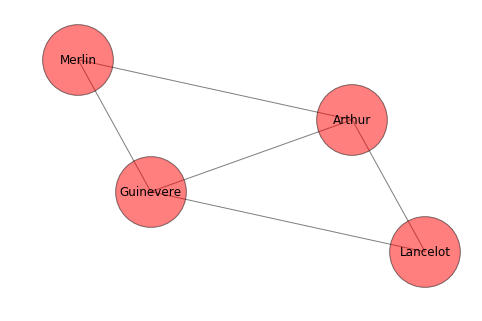

In [10]:
# Show Plots Inline
%matplotlib inline

# Import Plotting Modules
import matplotlib
import matplotlib.pyplot as Plot
import networkx as Nx

# Query All Relationships (and Coerce Generator to List so We Can Call it Repeatedly)
relationships = list(graph.match())

edges = []
labels = {}
for relationship in relationships:
    nodes = relationship.nodes()
    edge = relationshipMap[relationship.type()]
    # Apply Name Map to Retrieve Get Back First Names
    # Format: Tuple(node, node)
    edges.append((nameMap[dict(nodes[0])["fullName"]], nameMap[dict(nodes[1])["fullName"]]))
    # Generate Edge Labels (Node That This is Commented Out Because Labels Overlap One Another)
    # labels[(nameMap[dict(nodes[0])["fullName"]], nameMap[dict(nodes[1])["fullName"]])] = edge
    
# Plot Network
legendaryGraph = Nx.Graph()
legendaryGraph.add_edges_from(edges)
layout = Nx.spring_layout(legendaryGraph)
Nx.draw(legendaryGraph, layout, alpha = 0.5, node_size = 5000, edge_cmap = Plot.cm.Greens, with_labels = False)
Nx.draw_networkx_labels(legendaryGraph, layout, font_size = 12, font_family='sans-serif')
# Nx.draw_networkx_edge_labels(legendaryGraph, layout, font_size = 12, font_family='sans-serif')
Plot.axis('off')
Plot.savefig('plots/legendary-network.pdf', bbox_inches='tight')
Plot.show()

This is the end of the Neo4j portion of the tutorial, so if you don't have an interest in playing with the data from the DREAM Disease Module Identification Challenge...you're done! Otherwise, continue on for a fun 'extra-curricular.' To the [DREAM data](#DREAM-Data-Access)!

# Common Neo4j Issues & Their Solutions

All solutions validated on a Mac, other operating systems may have different paths and/or commands!

### Authentication Trouble
Security through authentication is important, but we're realists and know that this is a tutorial...so if you installed with homebrew and are having trouble getting the authentication up and running quickly, you can shut off authentication. To do that, do the following:

* Use your terminal to navigate to the following directory (replace `VERSION` with the version number you just wrote down):
```
cd ~/../../usr/local/Cellar/neo4j/VERSION/libexec/conf/
```
* Now in the ```conf/``` directory, open the file ```neo4j.conf``` using your preferred terminal editor (e.g. Vim, Emacs, Nano)
* Scroll through the file until you find the following line (it should be near the top):
```
# dbms.security.auth_enabled=false
```
* Per the instructions above it, uncomment the line. It should look like this: 
```
dbms.security.auth_enabled=false
```
* Save and close the file `neo4j.conf`
* Pat your self on the back; your database is now authentication free...

**<span style="color: green;">Tip:</span>** *If you didn't install with Homebrew or are using a different OS (not Mac OS X), these steps should be the same but the location of the `neo4j.conf` file will be different.* 

**<span style="color: red;">Caveat:</span>** *With great power comes great responsibility. In the interest of getting started quickly, we're offering the above instructions as an option. That said, we feel obliged to say that disabling authentication should never, ever be done in a production environment or for any database(s) hosting sensitive data. If you plan on using Neo4j outside the scope of this tutorial, be sure to setup authentication as intended (above). That said, rest assured the Neo4j documentation states that, unless configured to do so, Neo4j will not respond to external requests (i.e. not from your localhost)...although, the same documentation also states the above may make you vulnerable to a number of known attacks (e.g. cross-site scripting).*

### If You Previously Installed Neo4j and Forgot Your Username/Password

Resetting your Neo4j password isn't exactly intuitive. If you installed Neo4j using Homebrew previously and forgot your password, here's a reset method that *should* work (admittedly, I haven't quite sorted out the intricacies of this methods' behavior, but it has worked for me before and won't do any harm...): 

* Navigate to the location of Neo4j's authentication file (again, replace `VERSION` with the version number you just wrote down):
```
cd ~/../../usr/local/Cellar/neo4j/VERSION/libexec/data/dbms/
```
* Next, remove the authentication file and restart Neo4j.
```
rm auth
neo4j restart
```
* In your browser, go to [`http://localhost:7474`](http:////localhost:7474).

If it worked, you should be prompted to setup your authentication (again). 

**<span style="color: green;">Tip:</span>** This method was tested on a Homebrew installation, but if you can find the root of your Neo4j installation, from there you should be able to access ```data/dbms/``` and perform ```rm auth``` or similar.*

### Port Bind Exception

You may encounter the following error (piled within a big, ugly stack trace):
```
org.neo4j.helpers.PortBindException: Address localhost:7687 is already in use, cannot bind to it
```

The likely culprit is another java program running on your OS. A potential solution for this is to terminate all Java processes and then restarting neo4j:
```
killall -9 java
neo4j console
```

### Server Certificate Does Not Match Known Certificate for 'localhost'

You may encounter the following error when using the Python Neo4j driver middleware after upgrading Neo4j:
```
ProtocolError: Server certificate does not match known certificate for 'localhost'; check details in file '/Users/Benjamin/.neo4j/known_hosts'
```

If you're not accessing Neo4j using multiple hosts (which is unlikely), open up a terminal tab and run the following commands:
```
cd ~/.neo4j
rm known_hosts
touch known_hosts
```

If you are using multiple hosts, follow the above but, instead of removing the known_hosts file, edit the file to remove the localhost entry and its associated certificate key.

### General SSL Engine Problem

This error is the Java version of the above error:
```
General SSLEngine problem
```

To solve this, follow the same steps for the above error (Server Certificate Does Not Match Known Certificate for 'localhost').

# DREAM Data Access

We've placed the full [Disease Module Identification DREAM Challenge](https://www.synapse.org/#!Synapse:syn6156761/wiki/400645) data in a folder on the OHSU Church server. We'll be using a subset for the rest of the tutorial, but if you're feeling bold, go ahead and grab the full data and modify the code to load up a complete network. To get the data:

* Open up your preferred terminal app
* If you haven't already cloned this repository to your local machine, go ahead and do that now
    * To see how to do this, see the README.md of the Github repository
* With the repository cloned, cd to its root location.

### Just a Subset Please (< 10 MB uncompressed)

* Make a data directory and cd
```
mkdir -p data/subchallenge1/ && cd data/subchallenge1/
```
* Pull the data from Church: 
```
scp USERNAME@church.ohsu.edu:~/../cordierb/neo4j-tutorial/data/subchallenge1/2_ppi_anonym_v2.txt .
```

### Full Disease Module Detection DREAM Challenge Data (~300 - 400MB uncompressed)

* Pull the complete data folder from Church: 
```
scp -r USERNAME@church.ohsu.edu:~/../cordierb/neo4j-tutorial/data .
```

**<span style="color: green;">Tip:</span>** *If you're unfamiliar with the scp command, in brief, it allows you to transfer files and directories between machines (usually your local machine and a server). The trailing '.' in the command will pull the data to your current directory – if you're not already in the repository's directory, you can specify an absolute path in place of the '.' (e.g. ~/Desktop/neo4j-tutorial)*

# Exploring The DREAM Data With NetworkX

While Neo4j is a cool NoSQL database, given that the DREAM data for this tutorial has a relatively small footprint and Neo4j has few built in tools for robust graph analysis, a more sane approach is to just load up a DREAM TSV file into NetworkX and start an analysis, which is the approach we've opted for below.

**<span style="color: green;">Tip:</span>** *Much of these analyses take time to complete (at least several minutes) - even on the small 10MB subset. Make sure to watch the grey circle representing the Python Kernel of the Jupyter Notebook; if it's filled in grey, it's still running code.*
 
### Importing the DREAM data

In [11]:
import csv as CSV

# Set to Data Directory
dataFile = "data/subchallenge1/1_ppi_anonym_v2.txt"

# Open Data and Store edgeList Reference
with open(dataFile, "r") as data:
    edgeData = CSV.reader(data, delimiter = "\t")
    # The Edge Data is Imported as Strings, Let's Type the Edge Weights to Floats and Nodes to Integers
    edgeList = [tuple(map(lambda x: float(x) if "." in x else int(x), edge)) for edge in edgeData]
    
# So What Does an Individual Edge Look Like?
print("Example of an Edge From DREAM Data\n")
print("Node A \tNode B \tEdge Weight")
print("\t".join(str(x) for x in edgeList[0]))



Example of an Edge From DREAM Data

Node A 	Node B 	Edge Weight
0	3	0.461


### Generating The Network

In [12]:
# Import Modules - Note we Already Imported NetworkX & Matplotlib Above
from collections import defaultdict

# Create Graph Object & Add Edges
graph = Nx.Graph()
graph.add_weighted_edges_from(edgeList)

### Some Metrics

Some good things to know off the bat are:
* How many nodes are in the network?
* How many edges are in the network?
* How many connected components are in the network?
* For each connected component, how many nodes and edges are there?

For the last question, a special case of the connected component is the Big Component (i.e. the largest component), which often comprises the vast majority of edges in a network.

In addition, it's often valuable to also ask:
* What is the mean shortest path of the network (and its components)?
* What is the diameter of the network (and its components)? 

In [13]:
print("Network Metrics\n")

nodes = Nx.number_of_nodes(graph)
edges = Nx.number_of_edges(graph)
nComponents = Nx.number_connected_components(graph)

print("Nodes:", nodes)
print("Edges:", edges)
print("n Connected Components:", nComponents)

printBreak()

print("Computing Component Metrics...\n")

components = sorted(Nx.connected_component_subgraphs(graph), key = len, reverse = True)
bigComponent = components[0]

print("\tBig Component")
for component in components:
    print("\tNodes:", Nx.number_of_nodes(component))
    print("\tComponent Edges:", Nx.number_of_edges(component), "\n")
    # The Metrics Below Take A Long Time to Compute
    # print("\tComponent Diameter:", Nx.diameter(component))
    # print("\tMean (Weighted) Shortest Path:", NX.average_shortest_path_length(component, weighted = True)
    
# Given that the Big Component Comprises Over 99.99% of The Network, Let's Ignore The Rest
graph = Nx.Graph(bigComponent)

print(graph)

Network Metrics

Nodes: 17397
Edges: 2232405
n Connected Components: 4

_________________________________________________________

Computing Component Metrics...

	Big Component
	Nodes: 17388
	Component Edges: 2232398 

	Nodes: 4
	Component Edges: 3 

	Nodes: 3
	Component Edges: 3 

	Nodes: 2
	Component Edges: 1 




### Plotting The Network

Often times little is gained from plotting large biological networks (this is a personal opinion), especially if the nodes and edges are unlabeled as they are in the DREAM data. If you want to plot the 10MB network, uncomment the code below and arm your patience – it takes upwards of 20 minutes. 

**<span style="color: red;">Caveat:</span>** *While the plotting works technically, it is by no means optimized; the network is too large and ends up looking 'blobby'...or like a petridish with a vibrant culture. Point it, it's not pretty.*

In [14]:
# Uncomment to Plot The Network, This Takes A While...
# layout = Nx.spring_layout(graph)
# Nx.draw(graph, layout, alpha = 0.5, node_size=10, node_color='rgb(189, 221, 60)', edge_color='rgb(192, 192, 192)', edge_cmap=Plot.cm.Greens, with_labels = False)
# Plot.axis('off')
# Plot.savefig('dream-network.pdf', bbox_inches='tight')
# Plot.show()

### Plotting Network Degree Distribution

Networks with a degree distribution that follow a powerlaw are common and known as [scale-free networks](https://en.wikipedia.org/wiki/Scale-free_network). When doing the EDA for any network data, it's always a good idea to see if the data follows this assumption early in an analysis. 

AttributeError: 'tuple' object has no attribute 'savefig'

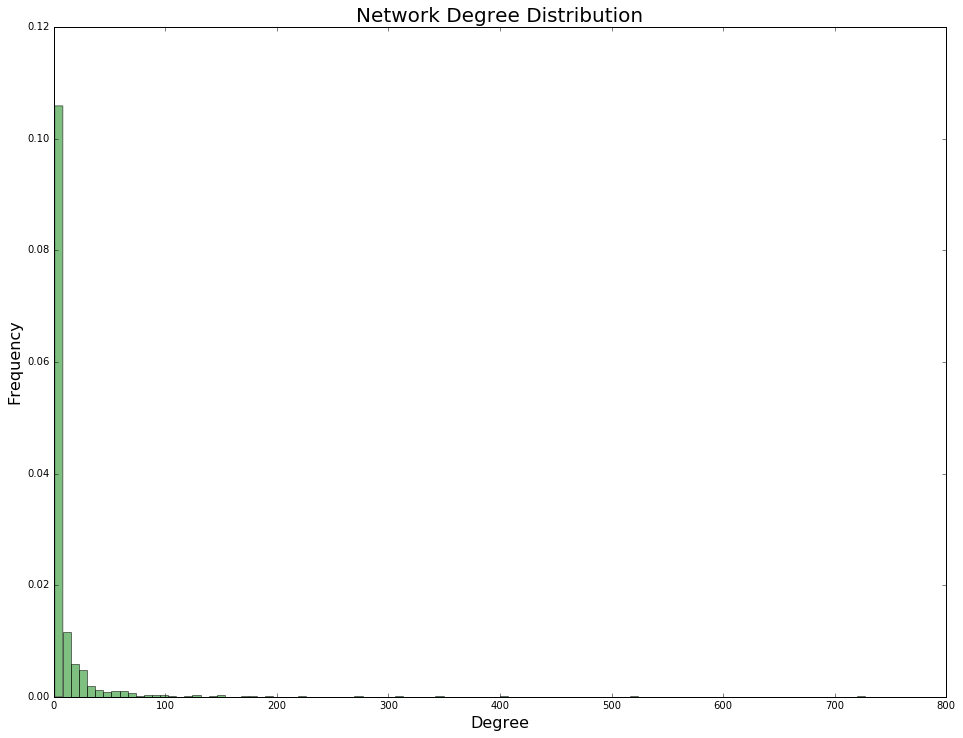

In [15]:
degrees = defaultdict(int)
for node, degree in Nx.degree(graph).items():
    degrees[degree] += 1

nDegrees = [count for degree, count in degrees.items()]

# Plot
figure = Plot.figure(num = None, figsize = (16, 12), dpi = 300)
axis = figure.add_subplot(111)
axis.set_title("Network Degree Distribution", fontsize = 20)
axis.set_xlabel('Degree', fontsize = 16)
axis.set_ylabel('Frequency', fontsize = 16)
plot = Plot.hist(nDegrees, bins = 100, normed = True, facecolor='green', alpha=0.5)
plot.savefig("plots/network-degree-distribution.pdf", bbox_inches='tight')

Now that's a heavy tail!

### Plotting Network Weighted Degree Distribution

Taking a page from [Newman (2004)](https://arxiv.org/pdf/cond-mat/0407503.pdf), it's also worth plotting the node-edge weight distribution. Since we only have edge weights, we can approximate the node weight by summing the weights of the relationships for a given node. Using this information, we can then plot an approximation of the Network's weighted degree distribution.

In [ ]:
weights = defaultdict(int)
for nodeA, nodeB, data in graph.edges(data = True): 
    weights[nodeA] += data["weight"]
    weights[nodeB] += data["weight"]
    
# Let's Set The Weights to Ints, Not Ideal
nWeights = [int(weight) for node, weight in weights.items()]

# Plot
figure = Plot.figure(num = None, figsize = (16, 12), dpi = 300)
axis = figure.add_subplot(111)
axis.set_title("Network Weighted Degree Distribution", fontsize = 20)
axis.set_xlabel('Weighted Degree', fontsize = 16)
axis.set_ylabel('Frequency', fontsize = 16)
plot = Plot.hist(nWeights, bins = 100, normed = True, facecolor='green', alpha=0.5)
plot.savefig("plots/network-weighted-degree-distribution.pdf", bbox_inches='tight')

### Centrality

There are many centrality measures for any given node in a network. For the network in question, three such measures are:

* [Degree Centrality](https://en.wikipedia.org/wiki/Centrality#Degree_centrality)
* [Eigenvector Centrality](https://en.wikipedia.org/wiki/Centrality#Eigenvector_centrality)
* [Betweenness Centrality](https://en.wikipedia.org/wiki/Centrality#Betweenness_centrality)

Below we compute two of these centrality measures for all the nodes in the network and then use the results to find the nodes with maximum and minimum centrality by each measure. We then also list the nodes with maximum centrality. While there is code for the third, it is not computed because of the time complexity – in its naive form, it involves the computation of shortest path between all node pairs in a network. The networkX implementation doesn't use this form but takes a while (hours), regardless. 

**<span style="color: red;">Caveat:</span>** *The code block below takes a while to compute (several minutes)*

In [ ]:
import operator

#
# Compute Centralities With NetworkX
#

print("\nComputing Degree Centrality...\n")
centralityDegree = Nx.degree_centrality(graph)
valuesDegree = [value for key, value in centralityDegree.items()]

# Get Maxes & Mins Degree Centrality
maxDegN = max(centralityDegree.items(), key = operator.itemgetter(1))[0]
maxDegC = max(valuesDegree)
minDegC = min(valuesDegree)

print("\tMax Degree Centrality Node:", maxDegN)
print("\tMax Degree Centrality:     ", maxDegC)
print("\tMin Degree Centrality:     ", minDegC)

print("\nComputing Eigenvector Centrality...\n")
centralityEigen = Nx.eigenvector_centrality(graph)
valuesEigen = [value for key, value in centralityEigen.items()]

# Get Maxes & Mins Eigenvector Centrality
maxEigN = max(centralityEigen.items(), key = operator.itemgetter(1))[0]
maxEigC = max(valuesEigen)
minEigC = min(valuesEigen)

print("\tMax Eigen Centrality Node:", maxEigN)
print("\tMax Eigen Centrality:     ", maxEigC)
print("\tMin Eigen Centrality:     ", minEigC)

# print("\nComputing Betweenness Centrality...\n")
# centralityBetween = Nx.betweenness_centrality(graph)
# valuesBetween = [value for key, value in centralityBetween.items()]

# # Get Maxes & Mins Betweenness Centrality
# maxBetN = max(centralityBetween.items(), key = operator.itemgetter(1))[0]
# maxBetC = max(valuesBetween)
# minBetC = min(valuesBetween)

# print("\tMax Betweenness Centrality Node:", maxBetN)
# print("\tMax Betweenness Centrality:     ", maxBetC)
# print("\tMin Betweenness Centrality:     ", minBetC)

### But Modules?

Module detection (aka community detection) is a challenging problem in graph theory with a [number of established approaches](https://en.wikipedia.org/wiki/Community_structure#Algorithms_for_finding_communities). Importantly, the DREAM Challenge states that a primary constraint to their detection problem is that communities are not allowed to overlap, which will influence any approaches to modeling the network for community detection or applying clustering algorithms. 

That said, module detection is outside the scope (and resources) of this Jupyter Notebook – even if we are working on a subset. That said, if you're interested in taking a crack at it, there are several software implementations for the detection of modules in biological networks. Here few examples to get you started:

* MTOM: [Software](https://labs.genetics.ucla.edu/horvath/MTOM/) / [Publication](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2727520/)
* General optimization technique for high-quality community detection in complex networks: [Software](http://senseable.mit.edu/community_detection/) / [Publication](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.90.012811)
* HyperModules: [Cytoscape plugin](http://apps.cytoscape.org/apps/hypermodules)
* NeMo: [Cytoscape plugin](http://apps.cytoscape.org/apps/nemo)


# Done!

You've come to the end of the tutorial, congrats! Take a break – you've earned it (and, besides, now you have time to kill while your computer churns, and churns, and churns...)

The exploration above is a truly basic exploratory data analysis (EDA); the analysis can go so much deeper. If you're interested in continuing with Python & NetworkX to explore the data further, get a speed boost with some parallelizations, and generate some real module identification predictions, it's worth checking out this book.

Cheers!